## Import Libraries

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

## Load Dataset


In [14]:
data = pd.read_csv('https://raw.githubusercontent.com/WilbertBryan/dataset/refs/heads/main/breast-cancer.csv')
data.head()

# Mengambil data menggunakan read_csv dan menampilkan 5 data teratas

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Exploratory Data Analysis


In [15]:
data.info()
# Terdapat 31 variable dan terdapat 569 data. Target Variabelya adalah diagnosis
# Tidak ada data yang kosong dan semua data set adalah numeric kecuali diagnosis berupa string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [16]:
data.drop('id', axis=1, inplace=True)
# drop id column. sehingga jumlah variabel menjadi 30

In [17]:
data.describe()

# Menampilkan distribusi data / statistik. Ini menampilkan jumlah data, rata-rata, standard deviasi,
# minimum data, quartal 1,2, dan 3 dan juga maximum data.

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [18]:
print(data['diagnosis'].unique())
# Menampilkan data unik dari kolom diagnosis. terdapat M (malignant) and B (benign).

['M' 'B']


In [19]:
data['diagnosis'] = data['diagnosis'].map({'M': 0, 'B': 1})

print(data['diagnosis'].unique())
print(data['diagnosis'].head())

# Meng-convert M menjadi 0 dan B menjadi 1

[0 1]
0    0
1    0
2    0
3    0
4    0
Name: diagnosis, dtype: int64


In [20]:
data.isnull().sum()

# Menampilkan jumlah data yang kosong. tidak ada data yang kosong

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


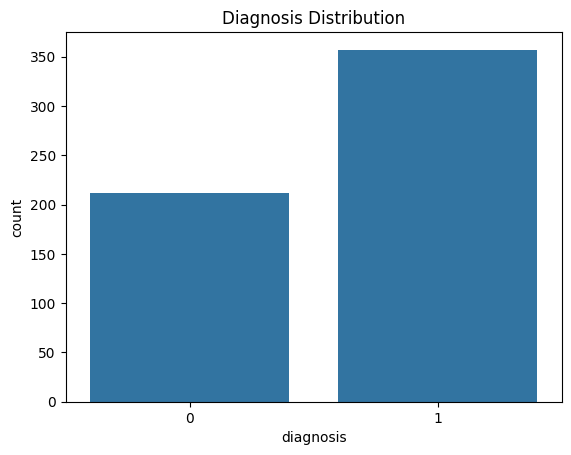

In [28]:
sns.countplot(x='diagnosis', data=data)
plt.title("Diagnosis Distribution")
plt.show()

# data 0 ada lah yang M dan data 1 adalah yang B. data dari yang 0 lebih sedikit dibandingkan dengan yang 1

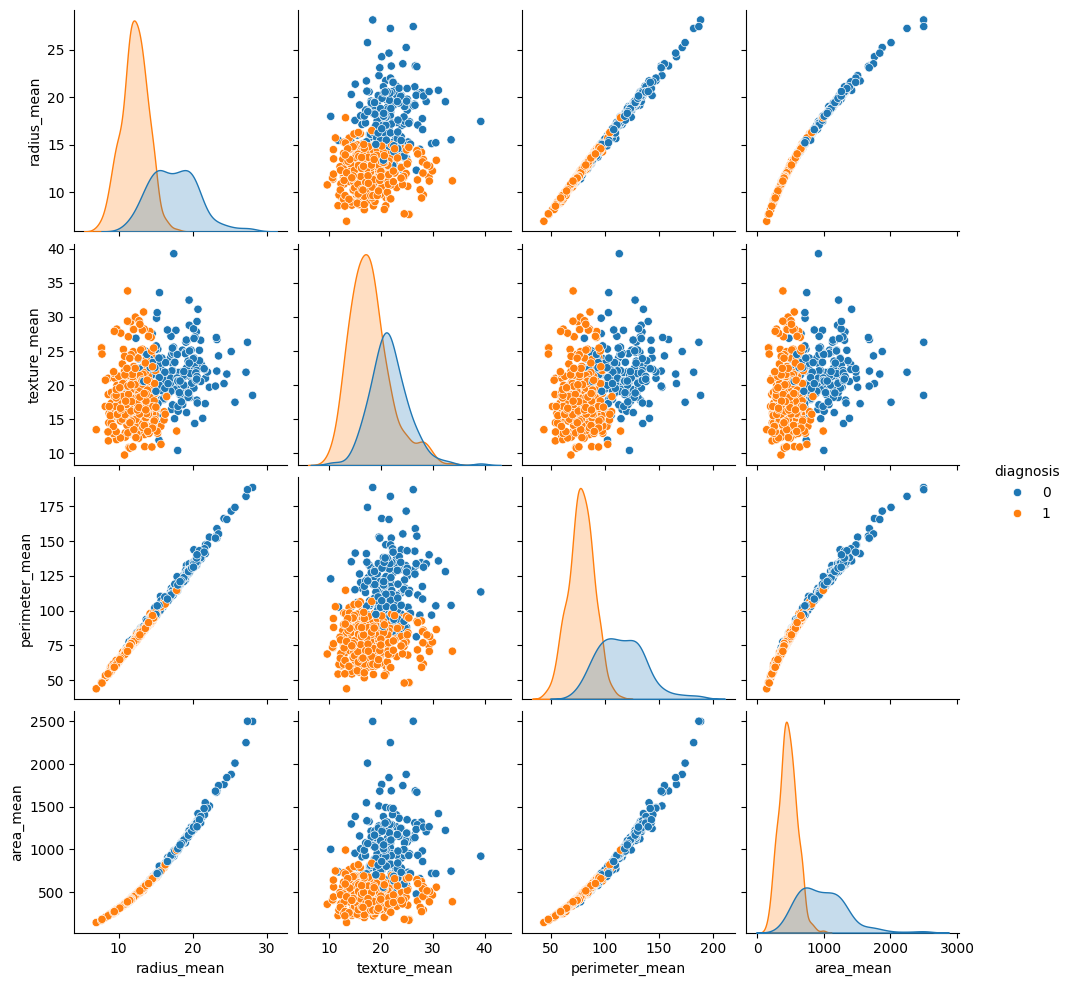

In [29]:
sns.pairplot(data, hue="diagnosis", vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean'])
plt.show()
# menampilkan hubungan antar variabel pada dataset. area_mean dan radius mean yang makin besar akan memiliki hubungan yang linear.
# diagnosis 1 atau M (malignant) memiliki radius_mean, perimeter_mean, dan area mean yang lebih besar dibandingkan diagnosis 1 atau B (benign)

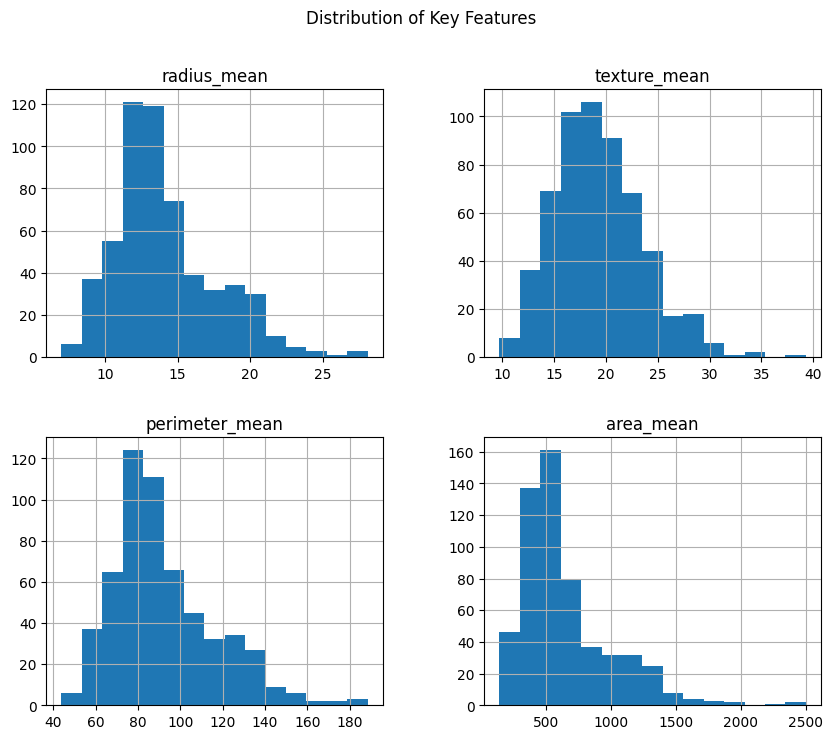

In [31]:
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']
data[features].hist(bins=15, figsize=(10, 8), layout=(2, 2))
plt.suptitle("Distribution of Key Features")
plt.show()
# Menampilkan distribusi data dari radius_mean, texture_mean, perimeter_mean, dan area_mean

##Machine Learning

In [33]:
X=data.drop('diagnosis',axis=1)
y=data['diagnosis']
# y adalah target variabel/ variabel yang di prediksi dan X adalah variabel yang memprediksi target

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# memisiah data dengan 20% untuk testing dan 80% untuk training

In [35]:
print(X_train.shape)
print(X_test.shape)

# Untuk X_train terdapat 455 row/data dan terdapat 30 column untuk training data.
# Untuk X_test terdapat 114 row/data dan terdapat  30 column untuk testing data.

(455, 30)
(114, 30)


## Decision Tree
using Entropy


In [46]:
model_entropy = DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state = 0)
model_entropy.fit(X_train, y_train)

# menggunakan model decision tree entropy dengan max_depth 3 dan random state 0

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [47]:
y_pred_entropy = model_entropy.predict(X_test)

# membuat y_pred_entropy untuk memprediksi X_test

In [48]:
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print("Model accuracy score with criterion entropy:", accuracy_entropy)

# Akurasi entropy sebesar 0.95 atau 95%

Model accuracy score with criterion entropy: 0.956140350877193


In [49]:
y_train_pred_entropy = model_entropy.predict(X_train)
accuracy_train_entropy = accuracy_score(y_train, y_train_pred_entropy)
accuracy_test_entropy = accuracy_score(y_test, y_pred_entropy)
print("Train Accuracy:", accuracy_train_entropy)
print("Test Accuracy:", accuracy_test_entropy)
# Hasil dari train dan test akurasi menunjukan hasil yang tidak overfitting maupun underfitting.
# Train dan test memiliki nilai yang seimbang

Train Accuracy: 0.9802197802197802
Test Accuracy: 0.956140350877193


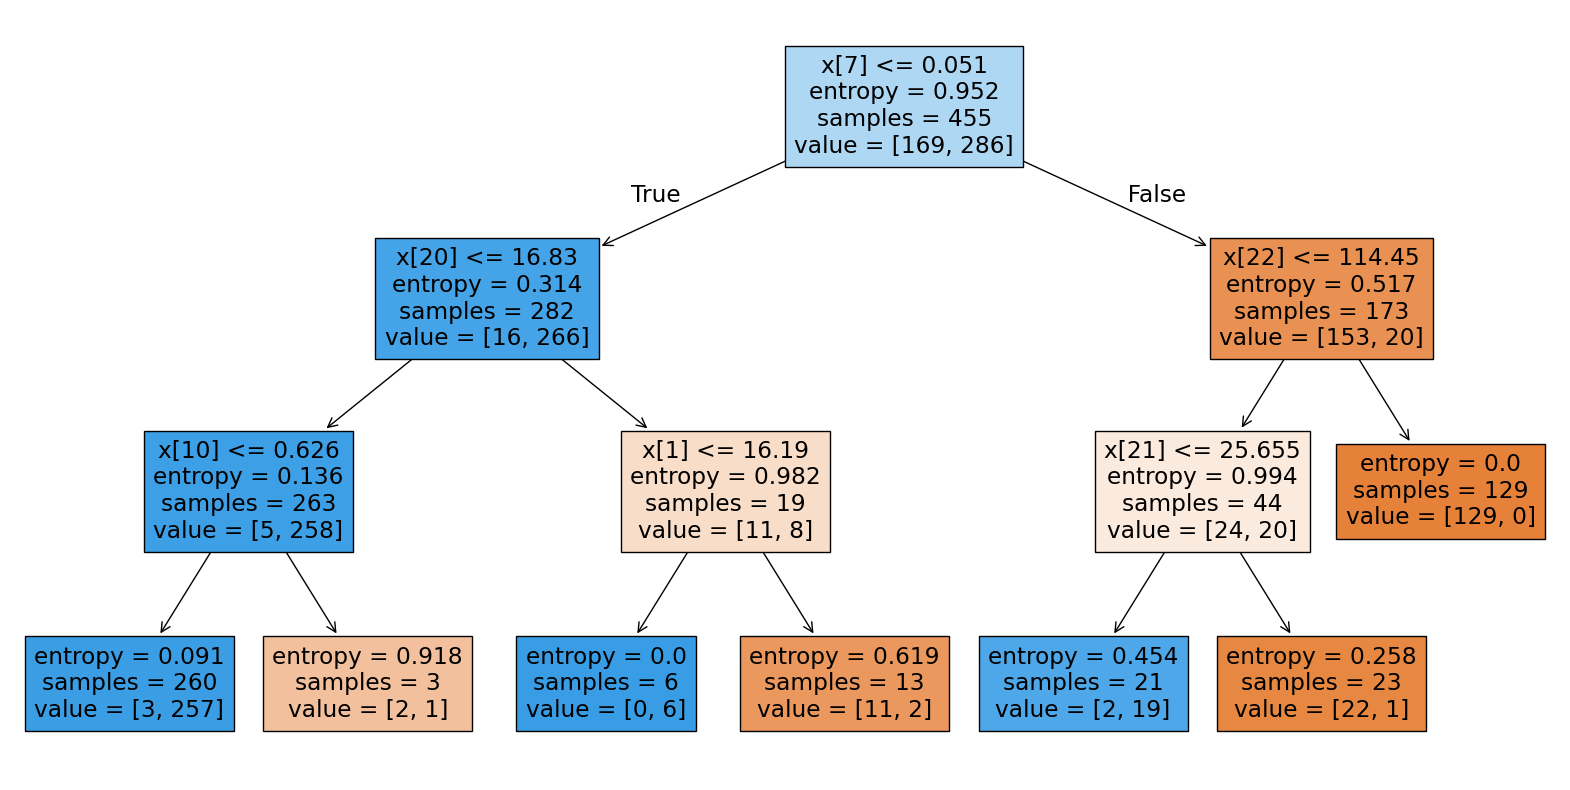

In [50]:
plt.figure(figsize=(20,10))
tree.plot_tree(model_entropy, filled=True)
plt.show()

using gini

In [51]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state = 0)
model_gini.fit(X_train, y_train)

# menggunakan model decision tree gini dengan max_depth 3 dan random state 0

DecisionTreeClassifier(max_depth=3, random_state=0)

In [52]:
y_pred_gini = model_gini.predict(X_test)

# membuat y_pred_gini untuk memprediksi X_test

In [53]:
accuracy_gini = accuracy_score(y_test, y_pred_gini)
print("Model accuracy score with criterion gini:", accuracy_gini)
# Akurasi gini sebesar 0.93 atau 93%

Model accuracy score with criterion gini: 0.9385964912280702


In [54]:
y_train_pred_gini = model_gini.predict(X_train)
accuracy_train_gini = accuracy_score(y_train, y_train_pred_gini)
accuracy_test_gini = accuracy_score(y_test, y_pred_gini)
print("Train Accuracy:", accuracy_train_gini)
print("Test Accuracy:", accuracy_test_gini)
# Hasil dari train dan test akurasi menunjukan hasil yang tidak overfitting maupun underfitting.

Train Accuracy: 0.978021978021978
Test Accuracy: 0.9385964912280702


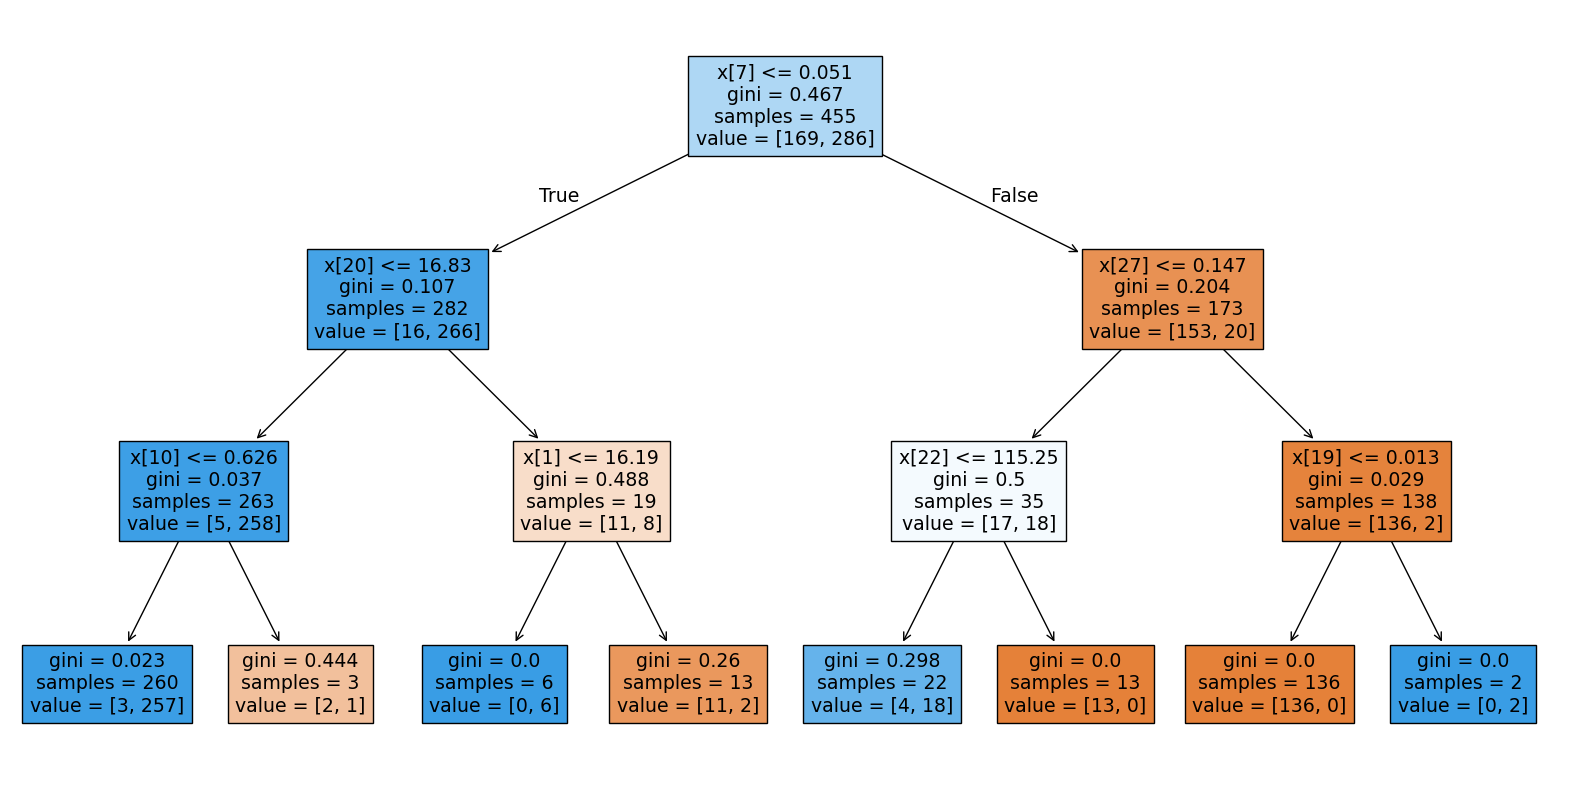

In [55]:
plt.figure(figsize=(20,10))
tree.plot_tree(model_gini, filled=True)
plt.show()

In [56]:
cm_entropy = confusion_matrix(y_test, y_pred_entropy)
cm_gini = confusion_matrix(y_test, y_pred_gini)

print("Confusion Matrix Entropy:")
print(cm_entropy)
print("\nConfusion Matrix Gini:")
print(cm_gini)

# Menampilkan confusion matrix dari entropy dan gini index

Confusion Matrix Entropy:
[[39  4]
 [ 1 70]]

Confusion Matrix Gini:
[[39  4]
 [ 3 68]]


In [57]:
print("Classification Report Entropy")
print(classification_report(y_test, y_pred_entropy))
print("\nClassification Report Gini")
print(classification_report(y_test, y_pred_gini))

Classification Report Entropy
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Classification Report Gini
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.94      0.96      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



## Naive Bayes

In [58]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
# menggunakan model naive bayes

GaussianNB()

In [59]:
y_pred_nb = model_nb.predict(X_test)

# membuat y_pred_nb untuk memprediksi X_test

In [60]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Model accuracy score with Naive Bayes:", accuracy_nb)

# Akurasi naive bayes sebesar 0.97 atau 97%

cm_nb = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix Naive Bayes:")
print(cm_nb)

# Menampilkan confusion matrix dari naive bayes

Model accuracy score with Naive Bayes: 0.9736842105263158
Confusion Matrix Naive Bayes:
[[40  3]
 [ 0 71]]


# K Nearest Neighbor

In [74]:
model_knn = KNeighborsClassifier(n_neighbors=11)
model_knn.fit(X_train, y_train)

# menggunakan model KNN dan menggunakan N sebesar 11

KNeighborsClassifier(n_neighbors=11)

In [75]:
y_pred_knn = model_knn.predict(X_test)

# membuat y_pred_reg untuk memprediksi X_test

In [76]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Model accuracy score with KNN:", accuracy_knn)

# Akurasi KNN sebesar 0.95 atau 79%

Model accuracy score with KNN: 0.9824561403508771


In [77]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix KNN:")
print(cm_knn)

# Menampilkan confusion matrix dari KNN

Confusion Matrix KNN:
[[41  2]
 [ 0 71]]


In [79]:
print("Classification Report Entropy")
print(classification_report(y_test, y_pred_entropy))

print("\nClassification Report Gini")
print(classification_report(y_test, y_pred_gini))


print("\nClassification Report Naive Bayes")
print(classification_report(y_test, y_pred_nb))

print("\nClassification Report KNN")
print(classification_report(y_test, y_pred_knn))

Classification Report Entropy
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Classification Report Gini
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.94      0.96      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114


Classification Report Naive Bayes
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97  

In [78]:
# KNN memiliki akurasi yang tertinggi yaitu 98% dan memiliki f1 score tertinggi untuk class 0 dan class 1.
# Ini menunjukkan KNN memiliki sedikit missklasifikasi
# Naive bayes memiliki performa akurasi 98% dan memiliki recall yang tinggi untuk class 0 sebesar 93% dan memiliki recall yang sempurna pada class 1 sebesar 100%
# Gini memiliki akurasi sebesar 94% dan entropy sebesar 96%. Maka dari itu decission tree memiliki performa buruk dibandingkan lainnya
# KNN memiliki performa yang lebih baik dengan memiliki akurasi tinggi, recall dan f1-score yang balance untuk class 0 dan class 1